<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/04_M%C3%A9todosNum%C3%A9ricos/02_M%C3%ADnimosCuadrados/01_Minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Mínimos Cuadrados </i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Ángel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

## Introducción

En estadística, inteligencia artificial, aprendizaje de máquina y ciencias en general, siempre ha sido una labor importante encontrar una función $f$ que 'ajuste' a un conjunto de datos.

Supongamos que como resultado de un experimento se obtienen 4 puntos $(x, y) : (1, 6), (2, 5), (3, 7), (4, 10)$. Y se busca encontrar una recta de la forma

$$y=\alpha+\beta x \qquad \text{(ecuación explícita de la recta)} $$

Que se ajuste lo mejor posible a este conjunto de datos, la idea es encontrar la recta que pase lo más cercano posible a todos estos puntos. Para encontrar dicha recta vamos a tratar de **minimizar el error que existe entre los datos reales y la aproximación** dada por la recta.

Si lo pensamos en forma de sistema de ecuaciones, se buscan valores $\alpha$, $\beta$ **que se aproximen a solucionar el sistema lineal** (sobredeterminado).

$$sistema = \begin{cases} 
\alpha+1\beta&=&6\\
\alpha+2\beta&=&5\\
\alpha+3\beta&=&7\\
\alpha+4\beta&=&10
\end{cases}$$


In [ ]:
# se clona todo el repositorio 
!git clone https://github.com/jugernaut/Numerico2021.git

# LINUX y MACOS
#%run "./MinimosCuadrados_interactive.ipynb"

# WINDOWS
# %run "/content/Numerico2021/05_MinimosCuadrados/MinimosCuadrados_interactive.ipynb"

# Google Coolab
%run "/content/Numerico2021/05_MinimosCuadrados/MinimosCuadrados_interactive.ipynb"

fatal: destination path 'Numerico2021' already exists and is not an empty directory.
fatal: destination path 'Numerico2021' already exists and is not an empty directory.


interactive(children=(IntSlider(value=0, description='alfa', max=3, min=-1), IntSlider(value=0, description='b…

## Mínimos Cuadrados

La forma de solucionar el problema antes mencionado, se conoce como 'ajuste por mínimos cuadrados'. Y la idea de este algoritmo es tratar de minimizar la suma de los cuadrados de los errores.

El error en cada punto entre la recta aproximada y los datos, es la suma del lado izquierdo y derecho de las ecuaciones del sistema $Ax=b$.

Visto de otra forma, el error entre cada valor real y la aproximación es la diferencia dentre el valor $y_i$ y el valor $ \hat y_i$, donde $y_i$ es el dato real y $ \hat y_i$ es el valor aproximado por la recta $\hat y=\alpha+\beta x$.

### Gradiente

Volviendo al ejemplo de la introducción, la idea es encontrar los valores $\alpha,\beta$ que logren minimizar la función de costos respecto a los datos reales y a la función.

$$\hat y=\alpha+\beta x$$

Es por eso que calculamos los errores al cuadrado (función de costos) en el sistema $F(\vec{x})=\vec{0}$, se suman y mediante el gradiente igualado a cero se buscan los valores $\alpha,\beta$ que minimicen la funcion $F$.

$$
\begin{array}{ccc}
F\left(\alpha,\beta\right) & = & \left[6-\left(\alpha+1\beta\right)\right]^{2}\\
 & + & \left[5-\left(\alpha+2\beta\right)\right]^{2}\\
 & + & \left[7-\left(\alpha+3\beta\right)\right]^{2}\\
 & + & \left[10-\left(\alpha+4\beta\right)\right]^{2}\\
 & = & 4\alpha^{2}+30\beta^{2}-56\alpha-154\beta+20\alpha\beta+210\\
F\left(\alpha,\beta\right) & = & 4\alpha^{2}+30\beta^{2}-56\alpha-154\beta+20\alpha\beta+210
\end{array}
$$  

El mínimo de la función $F$ se determina mediante las derivadas parciales de (también conocido como el gradiente) $F\left(\alpha,\beta\right)$ igualado a cero, es decir.

$$\frac{\delta F}{\delta\alpha}=0=8\alpha+20\beta-56\quad y\quad\frac{\delta F}{\delta\beta}=0=20\alpha+60\beta-154 \tag{1})$$

El sistema (1) es conocido como las **ecuaciones normales** (del sistema original $Ax=b$) debido a que se emplean las derivadas parciales igualadas a cero.

$$ecuaciones\,normales = \begin{cases} 
8 \alpha+20\beta-56&=&0\\
20\alpha+60\beta-154 &=&0
\end{cases}$$

¿Que hay de diferente en este nuevo sistema $A'x=b'$?.

La solución de este sistema es $\alpha=3.5$ y $\beta=1.4$, de tal manera que la recta que mejor aproxima linealmente todos los datos de este ejemplo es $$y=3.5+1.4x$$

De manera general el problema antes descrito lo podemos expresar de la siguiente forma. Sea $A\in\ M_{m\times n}$ sobre $\mathbb{R}$, el rango$(A)=n$ y $\vec{x}$,  $\vec{b}\in\mathbb{R}^{n}$.

Se tiene un sistema $A\vec{x}=\vec{b}$ que no tiene solución (ya que es sobredeterminado), lo que se busca es encontrar los coeficientes $x_{i}$ que hagan que la ecuación buscada se ajuste lo mejor posible en términos de minimización cuadrática.

En otras palabras, se trata de solucionar $A\vec{x}\approx\vec{b}$, por lo que se busca un vector $\hat{x}$ que minimice la función $F\left(\vec{x}\right)$, es decir

$$\hat{x}=min(F(\vec{x}))$$

Como $F(\vec{x})=\left\Vert A\vec{x}-\vec{b}\right\Vert _{2}^{2}$ y dado que se busca minimizar $F\left(\vec{x}\right)$ se emplea el gradiente ($\nabla$ operador nabla) igualado a cero.

Este problema de minimización tiene solución única ya que el rango de $A$ es $n$, finalmente el nuevo sistema es conocido como las ecuaciones normales que caracterizan al sistema original. 

### Función de costos

La función de costos es una función que determina que 'tan mala' es la aproximación respecto a los datos reales, para el caso de los mínimos cuadrados ésta función de costos, puede ser tan simple como la suma de los errores cuadráticos.

Para modelos más complejos, se agregan parámetros adicionales con el fin de que esta función devuelva un mejor resultado.

#### Error Cuadrático medio

El error cuadrático, es la forma mas sencilla en la cuál podemos representar la función de costos, asociada a una aproximación.

$\displaystyle Error\,Cuadrático= ||\hat{y}_i - y_i||^{2}_2 = \left(\left[\sum_{i=1}^{N} (\hat{y}_i - y_i)^2 \right]^{1/2}\right)^{2} = \sum_{i=1}^{N} (\hat{y}_i - y_i)^2$

En escencia es el cálculo de las diferencias al cuadrado de los datos reales con respecto a la aproximación.

En nuestro caso en particular. 

$$F(\vec{x})=\left\Vert A\vec{x}-\vec{b}\right\Vert _{2}^{2}= ||\hat{y}_i - y_i||^{2}_2$$

Y ya que necesitamos minimizar $F$, entonces empleamos el gardiente de $F$ igualado a cero para encontrar.

$$\hat{x}=min(F(\vec{x}))$$

Al generar la gráfica de esta función de costos se tiene la siguiente imágen.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/minimosCuadrados/errorcuadratico.png?raw=1" width="500">
</center>

### Descenso del gradiente

En el ejemplo mostrado en la introducción y el desarrollo mostrado en la sección del gradiente, se trata de minimizar la función de costos para la recta.

$$y=\alpha+\beta x$$

Se buscan parámetros $\alpha$, $\beta$, que minimicen la suma de los errores al cuadrado, para funciones de una variable el error cuadrático toma la forma de parábola, tal y como se muestra en la gráfica previa.

Sin embargo, podemos extender la idea de minimizar la función de costos para funciones de 2 variables, empleando de nuevo el gradiente y buscando minimizar el error cuadrático, en tal caso la gráfica asociada al error cuadrático toma la forma de bowl.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/minimosCuadrados/gradiente.png?raw=1" width="500">
</center>

En este caso (y en general para el aprendizaje de máquina) la idea es tomar el gradiente negativo (de aquí su nombre), evaluado en un elemento del espacio en el cual nos encontremos y el resultado nos indica las modificaciones que se tienen que hacer en el modelo original.

Para funciones de más de 2 variables es difícil imaginar qué forma toma la función de costos, sin embargo la idea de hacer uso del descenso del gradiente para minimizar la función de costos se puede seguir aplicando y se garantiza que se minimiza el error asociado entre los datos reales y la aproximación dada por el modelo.

Para una mayor comprensión del tema de aprendizaje de máquina y del descenso del gradiente revisa estos [videos](https://www.youtube.com/watch?v=jKCQsndqEGQ&list=UUQbsk1JQNaskUlfdoyiWJDg&index=5).



## Ecuaciones Normales

Una forma de expresar (y mostrar el desarrollo de como llegar) a las ecuaciones normales de un sistema $A\vec{x}=\vec{b}$ es empleando el gradiente.

Sin embargo existe una forma mas sencilla y compacta de expresar el sistema de ecuaciones normales que caracteriza a dicho sistema.

Sea $A \in\ M_{m\times n}$ sobre $\mathbb{R}$ (con $m\geq n$) y $rango(A)=n$, $\vec{b}\in\mathbb{R}^{m}$ y $\vec{x}$ la solución que minimiza el residual $r=\left\Vert A\vec{x}-\vec{b}\right\Vert _{2}^{2}$, entonces las ecuaciones normales están dadas por

$$A^{T}A\vec{x}=A^{T}\vec{b}$$


La idea principal para resolver problemas de minimización recae en el concepto de proyección ortogonal. Suponiendo que el vector $\vec{b}$ no pertenece al subespacio generado por las columnas de la matriz $A$ (o $Im(A)$), denotamos por 

$$P_{A}:R^{m}\longrightarrow Im(A)$$

A la proyección ortogonal que mapea $R^{m}$ sobre $Im(A)$. Entonces el valor $\vec{x}$ que minimiza el residual $\vec{r}=A\vec{x}-\vec{b}$ es aquel que satisface $A\vec{x}=P_{A}\vec{b}$.


En otras palabras el residual $\vec{r}=A\vec{x}-\vec{b}$ debe ser ortogonal al subespacio generado por las columnas de $A$.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/minimosCuadrados/generado.PNG?raw=1" width="500">
</center>

### Teorema

Sea $A\in\mathbb{R}_{m\times n}$ (con $m\geq n$) y $rango(A)=n$ y $\vec{b}\in\mathbb{R}^{m}$. El residual $\vec{r}=A\vec{x}-\vec{b}$ es ortogonal a $Im(A)$ (subespacio generado por los vectores columna de la matriz $A$) si y solo si 

$$A^{T}A\vec{x}=A^{T}\vec{b}$$

**Demostración.** 

El residual $\vec{r}$ es ortogonal a $Im(A)$ si y solo si $\vec{a}_{i}^{T}\vec{r}=0$ $\forall i=1,\ldots,n$. Por lo tanto $\vec{r}$ es ortogonal a $Im(A)$ si y solo si

$$A^{T}\left(A\vec{x}-\vec{b}\right)=\vec{0} \tag{2} $$

Pero de (2) tenemos que

$$A^{T}\left(A\vec{x}-\vec{b}\right)=A^{T}A\vec{x}-A^{T}\vec{b}=\vec{0}\Longrightarrow A^{T}A\vec{x}=A^{T}\vec{b}$$

Por lo tanto $\vec{r}$ es ortogonal a $Im(A)$ si y solo si

$$A^{T}A\vec{x}=A^{T}\vec{b}$$

### Ejemplo

Encuentre las ecuaciones normales del sistema $A\vec{x}=\vec{b}$ y encuentre la ecuación de la recta que se ajusta de mejor manera a los puntos: $\left(x,y\right)$: $ \color{red}{(1,6),(2,5),(3,7),(4,10)}$ 

**Solución:** Dados los puntos $(x,y)$ de este ejemplo, se busca minimizar la función que se ajuste a todos ellos y que minimice la función de costos (errores cuadráticos) entonces el sistema $A\vec{x}=\vec{b}$ es el siguiente.

$$A\vec{x}=\left(\begin{array}{cc}
1 & 1\\
1 & 2\\
1 & 3\\
1 & 4
\end{array}\right)\left(\begin{array}{c}
\alpha\\
\beta
\end{array}\right)=\left(\begin{array}{c}
6\\
5\\
7\\
10
\end{array}\right) $$

Así que empleando el teorema antes mencionado, las ecuaciones normales de este sistema son $A^{T}A\vec{x}=A^{T}\vec{b}$

$$\left[\left(\begin{array}{cccc}
1 & 1 & 1 & 1\\
1 & 2 & 3 & 4
\end{array}\right)\left(\begin{array}{cc}
1 & 1\\
1 & 2\\
1 & 3\\
1 & 4
\end{array}\right)\right]\left(\begin{array}{c}
\hat{x}_{1}\\
\hat{x}_{2}
\end{array}\right)=\left(\begin{array}{cccc}
1 & 1 & 1 & 1\\
1 & 2 & 3 & 4
\end{array}\right)\left(\begin{array}{c}
6\\
5\\
7\\
10
\end{array}\right) $$

Al resolver este nuevo sistema $(A\hat{x}=\vec{b})$ se obtiene que el vector solución es $\left(3.5,1.4\right)$, así que la recta que mejor se ajusta a los datos de este ejemplo es

$$ y=3.5+1.4x$$

!Compruébalo con $\color{green}{Python}$!

[3.5 1.4]


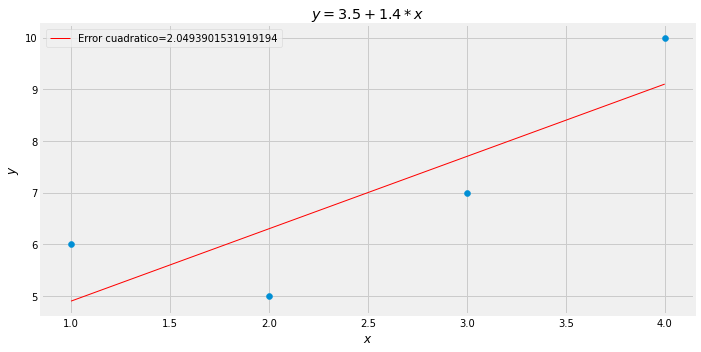

In [ ]:
%matplotlib inline

# se define la matriz asociada a los datos
A = np.array([[1.,1.],[1.,2.],[1.,3.],[1.,4.]])

# vecto b del sistema original Ax=b
b = np.array([6.,5.,7.,10.])

# dado que se usa la transpuesta varias veces se almacena en memoria
aTr = A.T

# nueva matriz correspondiente a las ecuaciones normales
aTrA = np.matmul(aTr, A)

# nuevo vector b correspondiente a las ecuaciones normales
aTrb = np.matmul(aTr, b)

# calculamos la solucion (alfa, beta) que minimiza el sistema original
xmin = np.linalg.solve(aTrA, aTrb)

# mostramos el resultado
print(xmin)

# al graficar la recta obtenemos la recta que minimiza la funcion de costos
recta = lambda x : xmin[0]+ xmin[1]*x

# funcio de costos (error cuadratico)
costo = lambda y, yaprox: np.sqrt(np.sum((y - yaprox)**2))

# generamos el dominio de la grafica
x = np.linspace(A[0,1], A[-1,1], len(A))

# valores que minimizan la funcion de costos
yaprox = recta(x)

# valor de la funcion de costos
error = costo(b,yaprox)

par = [{'title':'$y=3.5+1.4*x$', 
        'xlabel':'$x$',
        'ylabel':'$y$'}]
graf = vis.planoCartesiano(par=par)
# datos reales (1,6), (2,5),..,(4,10)
graf.scatter(x=x,y=b)
# recta que minimiza la funcion de costos
graf.plot(x=x, y=yaprox, par={'ls':'-', 'lw':1, 'color':'red', 'label':'Error cuadratico='+str(error)})
# leyenda del error cuadratico
graf.legend()

plt.show()


### Factorizaciones

Como ya se ha visto a lo largo de este curso, es recurrente tratar de resolver un sistema del tipo $A\vec{x}=\vec{b}$ y dado que el cálculo de la matriz inversa de $A$ es un proceso costoso, se buscan alternativas.

La matriz asociada al sistema de ecuaciones normales $\left(A^{T}A\right)$ vista en la sección anterior, tiene peculiares características **simétrica y positiva definida** que la convierte en candidato a diferentes tipos de factorizaciones, en este caso la factorización $QR$.

Una matriz $A\in M_{n\times n}$ sobre $\mathbb{R}$.

1. Es simétrica si: $A=A^{T}$

2. Es positiva definida si: Todos sus determinantes superiores izquierdos de $i\times i,\quad i=1,\ldots,n$ son positivos. 


**Teorema**

Sea$A\in M_{m\times n}$ sobre $\mathbb{R}$ (con $m\geq n$) y $rango\left(A\right)=n$ existe al menos una factorización $QR$ tal que

$$A=QR\quad con \quad r_{ii}>0\quad i=1,\ldots,n$$

### Método de Gram-Schmidt.

La idea detrás de la factorización $QR$ es construir una base ortonormal $\left(q_{1},q_{2},\ldots,q_{n}\in R^{m}\right)$ para el subespacio generado por los vectores columna de A.

*  Se comienza utilizando el primer vector columna de $A\, (a_{1})$. Es decir $q_{1}=\frac{a_{1}}{\left\Vert a_{1}\right\Vert _{2}}$.

* A continuación se substrae del vector $a_{2}$ su coeficiente en la dirección de $q_{1}$, es decir $\left(q_{1}^{T}\cdot a_{2}\right)\cdot q_{1}$. Dando como resultado un vector $q_{2}$, que es ortogonal a $q_{1}$. Finalmente se normaliza el vector $q_{2}$ para volverlo ortonormal.


* El proceso se repite con el resto de los vectores columna de $A=\left[a_{1},a_{2},\ldots,a_{n}\right]$


En términos matemáticos, el proceso se vería de la siguiente manera.

### Algoritmo.

1. $q_{1}=\frac{v_{1}}{\left\Vert v_{1}\right\Vert _{2}}\quad con\quad v_{1}=a_{1}$

2. $ q_{2}=\frac{v_{2}}{\left\Vert v_{2}\right\Vert _{2}}\quad con\quad v_{2}=a_{2}-\left(q_{1}^{T}\cdot a_{2}\right)\cdot q_{1} $

3. $q_{3}=\frac{v_{3}}{\left\Vert v_{3}\right\Vert _{2}}\quad con\quad v_{3}=a_{3}-\left(q_{1}^{T}\cdot a_{3}\right)\cdot q_{1}-\left(q_{2}^{T}\cdot a_{3}\right)\cdot q_{2} $


4. En general el j-esimo paso, suponiendo conocidos $q_{1},\ldots,q_{j-1}$, es un vector $q_{j}$ ortonormal a todos los vectores ya conocidos, es decir

$$ q_{j}=\frac{v_{j}}{\left\Vert v_{j}\right\Vert _{2}}\quad con\quad v_{j}=a_{j}-\left(q_{1}^{T}\cdot a_{j}\right)\cdot q_{1}-\cdots-\left(q_{j-1}^{T}\cdot a_{j}\right)\cdot q_{j-1}$$


5. En forma de suma, el vector $v_{j}$ se ve de la siguiente manera

$$v_{j}=a_{j}-\sum_{i=1}^{j-1}\left(q_{i}^{T}\cdot a_{j}\right)\cdot q_{i}$$


$\color{blue}{EJEMPLO.}$


$Sea \quad A=\left(\begin{array}{ccc}
-1 & -1 & 1\\
1 & 3 & 3\\
-1 & -1 & 5\\
1 & 3 & 7
\end{array}\right)$ encuentre su factorización $A=QR$ 

$\color{blue}{Solución:}$


$$q_{1}=\frac{v_{1}}{\left\Vert v_{1}\right\Vert _{2}}\quad v_{1}=a_{1}=\left(\begin{array}{c}
-1\\
1\\
-1\\
1
\end{array}\right)\quad{\color{red}r}_{{\color{red}{11}}}=\left\Vert v_{1}\right\Vert _{2}=2\Longrightarrow{\color{red}{q_{1}=\frac{v_{1}}{r_{11}}=\left(\begin{array}{c}
-\frac{1}{2}\\
\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)}}\quad{\color{red}r}_{{\color{red}{12}}}=q_{1}^{T}a_{2}=4 $$


$$v_{2}=a_{2}-r_{12}q_{1}=\left(\begin{array}{c}
-1\\
3\\
-1\\
3
\end{array}\right)-4\left(\begin{array}{c}
-\frac{1}{2}\\
\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)=\left(\begin{array}{c}
1\\
1\\
1\\
1
\end{array}\right)$$


$${\color{red}r}_{{\color{red}{22}}}=\left\Vert v_{2}\right\Vert _{2}=2\Longrightarrow{\color{red}{q_{2}=\frac{v_{2}}{r_{22}}=\left(\begin{array}{c}
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)}}$$

$${\color{red}r}_{{\color{red}{13}}}=q_{1}^{T}a_{3}=2 \quad y \quad {\color{red}r}_{{\color{red}{23}}}=q_{2}^{T}a_{3}=8$$


$$v_{3}=a_{3}-r_{13}q_{1}-r_{23}q_{2}=\left(\begin{array}{c}
1\\
3\\
5\\
7
\end{array}\right)-2\left(\begin{array}{c}
-\frac{1}{2}\\
\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)-8\left(\begin{array}{c}
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)=\left(\begin{array}{c}
-2\\
-2\\
2\\
2
\end{array}\right)$$


$${\color{red}r}_{{\color{red}{33}}}=\left\Vert v_{3}\right\Vert _{2}=4\Longrightarrow{\color{red}{q_{3}=\frac{v_{2}}{r_{33}}=\left(\begin{array}{c}
-\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)} }$$

**Por lo tanto**

$$ A=\left(\begin{array}{ccc}
-1 & -1 & 1\\
1 & 3 & 3\\
-1 & -1 & 5\\
1 & 3 & 7
\end{array}\right)=\left(\begin{array}{ccc}
q_{1} & q_{2} & q_{3}\end{array}\right)\left(\begin{array}{ccc}
r_{11} & r_{12} & r_{13}\\
0 & r_{22} & r_{23}\\
0 & 0 & r_{33}
\end{array}\right)\left(\begin{array}{ccc}
-1 & -1 & 1\\
1 & 3 & 3\\
-1 & -1 & 5\\
1 & 3 & 7
\end{array}\right)=\left(\begin{array}{ccc}
-\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
-\frac{1}{2} & \frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2} & \frac{1}{2}
\end{array}\right)\left(\begin{array}{ccc}
2 & 4 & 2\\
0 & 2 & 8\\
0 & 0 & 4
\end{array}\right) $$

¡Compruébalo con $\color{green}{Python}$!

### Propiedades de QR 

La factorización $QR$ implica que la matriz $Q$ es una matriz ortonormal y la matriz $R$ es una matriz triangular superior. Estos factores tiene muchas ventajas.

**Hecho.** 

Sea $A\in M_{n\times n}$ sobre $\mathbb{R}$.

1. Si $Q$ es ortogonal entonces $Q^{T}Q=Id$

2. $QR=A\Longrightarrow R=Q^{T}A.$

3. Dado que de las ecuaciones normales definidas por $A^{T}A\vec{x}=A^{T}\vec{b}$, garantizan que $A^{T}A$ es una matriz positiva definida, entonces $A^{T}A$ se pude factorizar en $QR$.

4. Sea $A'=A^{T}A$ y $b'=A^{T}\vec{b}$. Entonces

$$A'\vec{x}=b'\Longrightarrow QR\vec{x}=b'\Longrightarrow Q^{T}QR\vec{x}=Q^{T}b' \Longrightarrow R\vec{x}=Q^{T}b'$$

Y resulta que es un sistema triangular que puede ser resuelto fácilmente mediante su buen amigo, substitución hacia atrás.

<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/minimosCuadrados/algQR.PNG?raw=1" width="500">

## Procedimiento general para Mínimos Cuadrados

Ya que se entendido el por que es útil entender el proceso de mínimos cuadrados y como es que las factorizaciones ayudan a resolverlo, ahora lo que resta es automatizar todo el proceso que lleva a resolver el problema general, es decir.

* Se tiene una lista de puntos de la forma $\left(x,y\right)$, donde cada punto representa datos reales de algún fenómeno (estadística, genética, geofísica, física biomédica, etc).

* A continuación se encuentran las ecuaciones normales del sistema empleando la igualdad $A^{T}A\vec{x}=A^{T}\vec{b}=b'.$

* Aplicamos alguna factorización, por ejemplo Cholesky $A^{T}A=A\text{'}=LL^{T}$ ó $A\text{'}=QR$ empleando el proceso de Gram-Schmidt para encontrar una base ortonormal para el subespacio generado por los vectores columna de $A'$.

* Aplicando las propiedades de $L^{T}$ y $L$ ó $Q$ y $R$ se resuelve el nuevo sistema (mediante substitución hacia atrás), es decir $QR\vec{x}=b'$ $\Longrightarrow$  $R\vec{x}=Q^{T}b'$.

* Una vez encontrados los coeficientes $\alpha$ y $\beta$ de la recta que minimizan los errores cuadráticos, ahora es posible graficar dicha recta e incluso interpolar.

¡Intentalo con $\color{green}{Python}$!

Se tienen los siguientes datos y se busca la recta que ajuste mejor a estos datos.

| Mes | Enero |  Febrero | Marzo | Abril |
| :-:  | :-: | :-: |  :-: | :-: |
| Pesos  | 20.73 | 20.77 | 19.90 | 18.73 |



[21.75  -0.687]


AssertionError: ignored

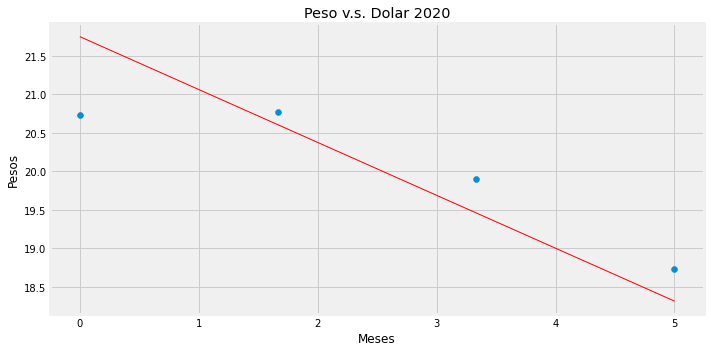

In [ ]:
# funcion que calcula los coeficientes alfa y betha
def minimos(A,b):
    At = A.T
    # ecuaciones normales
    aprim = np.matmul(At,A)
    bprim = np.matmul(At,b)
    # utilizando cholesky 
    L = vis.cholesky(aprim)
    y = vis.sustDelante(L, bprim)
    x = vis.sustAtras(L, y)
    # vector solucion del sistema de ecuaciones normales
    return x

# funcion que recibe el sistema original y grafica la
# recta que minimiza la funcion de costos (minimos cuadrados)
def grafMinimos(A,b):
    # coeficientes de la recta
    mini = minimos(A, b)
    #dominio del problema
    x = np.linspace(A[1,0]-1,A[-1,1]+1,len(A))
    # ecuacion de la recta
    recta = lambda x: mini[0]+mini[1]*x
    # mese a extrapolar
    mayo = recta(5.0)
    junio = recta(6.0)
    # funcio de costos (error cuadratico)
    costo = lambda y, yaprox: np.sqrt(np.sum((y - yaprox)**2))
    # valores que minimizan la funcion de costos
    yaprox = recta(x)
    # valor de la funcion de costos
    error = costo(b,yaprox)
    # parametros de la grafica
    par = [{'title':'Peso v.s. Dolar 2020', 
            'xlabel':'Meses',
            'ylabel':'Pesos'}]
    graf = vis.planoCartesiano(par=par)
    # datos reales (1,6), (2,5),..,(4,10)
    graf.scatter(x=x,y=b)
    # recta que minimiza la funcion de costos
    graf.plot(x=x, y=yaprox, par={'ls':'-', 'lw':1, 'color':'red', 'label':'Error cuadratico='+str(error)})
    # meses
    #graf.scatter(5.0, mayo)
    #graf.scatter(6.0, junio)
    # leyenda del error cuadratico
    graf.legend()
    # se muestra la grafica
    graf.show()

#Se define el conjunto de datos que seran ajustados
mat = np.array([[1.0,1.0],[1.0,2.0],[1.0,3.0],[1.0,4.0]])
b = np.array([20.73,20.77,19.90,18.73])
#Se calculan los coeficientes de la recta que ajusta los datos
x = minimos(mat, b)
# se imprimen los coeficientes alfa y betha que ajustan la recta
print(x)
# se grafica lo necesario y se interpola
grafMinimos(mat,b)

## Referencias

*   http://matematicas.uis.edu.co/sites/default/files/paginas/archivos/Minimos%20Cuadrados%20%281%29.pdf
*   https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/#Aprendizaje_El_metodo_de_los_minimos_cuadrados
*   https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba, Introducción a los Métodos Numéricos.
*   Riswan Butt, Numerical Analysys Using Matlab, Jones and Bartlett.
*   Ward Cheney, David Kincaid, Métodos Numéricos y Computación, Cenage Learning.
*   Justin Solomon: Numerical Algorithms.
*   Jaan Kiusalaas: Numerical Methods in Engineering with Python.
*   http://www.ehu.eus/izaballa/Ana_Matr/Apuntes/lec8.pdf
*   http://pcmap.unizar.es/~mpala/C_N_lecci/CN_1II2_SELdir.pdf
